In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Пример чистых данных

In [68]:
air_quality = pd.read_csv('datasets/airquality.csv')
air_quality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


# Почему это удобно? 

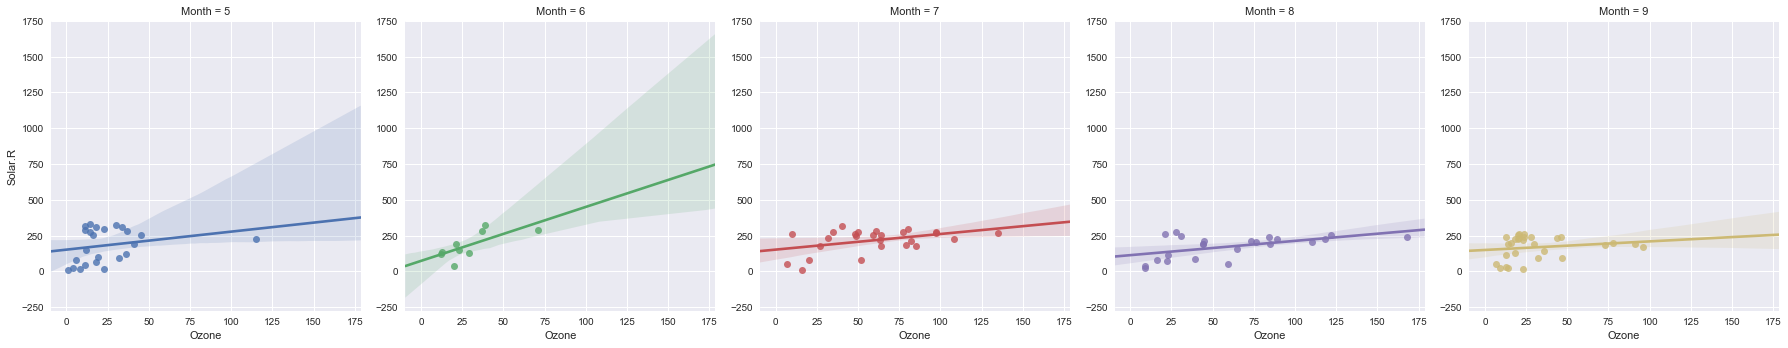

In [90]:
sns.set()
sns.lmplot(x="Ozone", y="Solar.R", hue="Month", col="Month",
           data=air_quality);
plt.show()

# Суровая реальность
Данные росстата 


In [159]:
prices = pd.read_excel('datasets/rosstat_prices.xlsx', header = 3, usecols=[1,2,3,4,5,6,7])
prices.head()

февраль  \
Россия (код по ОКСМ) Мясо индейки,кг                            332.12   
                     Консервы мясные для детского питания, кг   717.73   
                     Креветки мороженые неразделанные, кг       664.94   
                     Кальмары мороженые,кг                      309.60   
                     Какао, кг                                  692.68   

                                                                 март  апрель  \
Россия (код по ОКСМ) Мясо индейки,кг                           330.86  329.56   
                     Консервы мясные для детского питания, кг  717.23  719.30   
                     Креветки мороженые неразделанные, кг      664.40  667.03   
                     Кальмары мороженые,кг                     311.69  315.18   
                     Какао, кг                                 711.63  712.49   

                                                                   май  \
Россия (код по ОКСМ) Мясо индейки,кг                            329.50   
                     Консервы мясные для детского питания, кг   717.01   
                     Креветки мороженые неразделанные, кг       665.73   
                     Кальмары мороженые,кг                      318.57   
                     Какао, кг                                 2000.00   

                                                                 июнь    июль  \
Россия (код по ОКСМ) Мясо индейки,кг                           332.29  335.30   
                     Консервы мясные для детского питания, кг  716.91  717.62   
                     Креветки мороженые неразделанные, кг      667.46  666.32   
                     Кальмары мороженые,кг                     323.32  325.37   
                     Какао, кг                                 712.16  712.41   

                                                               август  
Россия (код по ОКСМ) Мясо индейки,кг                           338.84  
                     Консервы мясные для детского питания, кг  717.27  
                     Креветки мороженые неразделанные, кг      666.11  
                     Кальмары мороженые,кг                     324.00  
                     Какао, кг                                 716.23

## Диагностируем проблемы

In [160]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 515 entries, (Россия (код по ОКСМ), Мясо индейки,кг) to (Россия (код по ОКСМ), Яйца куриные, 10 шт.)
Data columns (total 7 columns):
февраль    515 non-null float64
март       513 non-null float64
апрель     513 non-null float64
май        513 non-null float64
июнь       513 non-null float64
июль       513 non-null float64
август     513 non-null float64
dtypes: float64(7)
memory usage: 33.7+ KB


In [161]:
prices.columns

Index([u'февраль', u'март', u'апрель', u'май', u'июнь', u'июль', u'август'], dtype='object')

## Убираем лишнюю группировку

In [162]:
prices = prices.reset_index()
prices.head()

,level_0,level_1,февраль,март,апрель,май,июнь,июль,август
0,Россия (код по ОКСМ),"Мясо индейки,кг",332.12,330.86,329.56,329.50,332.29,335.30,338.84
1,Россия (код по ОКСМ),"Консервы мясные для детского питания, кг",717.73,717.23,719.30,717.01,716.91,717.62,717.27
2,Россия (код по ОКСМ),"Креветки мороженые неразделанные, кг",664.94,664.40,667.03,665.73,667.46,666.32,666.11
3,Россия (код по ОКСМ),"Кальмары мороженые,кг",309.60,311.69,315.18,318.57,323.32,325.37,324.00
4,Россия (код по ОКСМ),"Какао, кг",692.68,711.63,712.49,2000.00,712.16,712.41,716.23


In [163]:
prices = prices.iloc[:, 1:9]
prices = prices.rename(index=str, columns={u"level_1": u"наименование"})
prices.head()

,наименование,февраль,март,апрель,май,июнь,июль,август
0,"Мясо индейки,кг",332.12,330.86,329.56,329.50,332.29,335.30,338.84
1,"Консервы мясные для детского питания, кг",717.73,717.23,719.30,717.01,716.91,717.62,717.27
2,"Креветки мороженые неразделанные, кг",664.94,664.40,667.03,665.73,667.46,666.32,666.11
3,"Кальмары мороженые,кг",309.60,311.69,315.18,318.57,323.32,325.37,324.00
4,"Какао, кг",692.68,711.63,712.49,2000.00,712.16,712.41,716.23


## Слияние столбцов с помощью melt

In [164]:
prices = pd.melt(frame=prices, id_vars=u"наименование",var_name=u'месяц', value_name=u'цена',
                 value_vars=[u'февраль',u'март',u'апрель',u'май',u'июнь',u'июль',u'август'])

In [165]:
prices.head()

,наименование,месяц,цена
0,"Мясо индейки,кг",февраль,332.12
1,"Консервы мясные для детского питания, кг",февраль,717.73
2,"Креветки мороженые неразделанные, кг",февраль,664.94
3,"Кальмары мороженые,кг",февраль,309.60
4,"Какао, кг",февраль,692.68


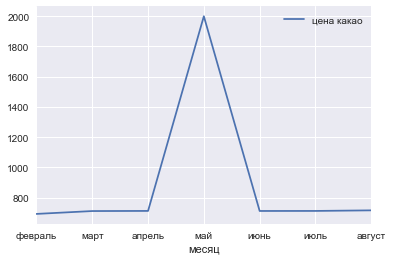

In [166]:
prices[prices[u'наименование']==u'Какао, кг'].plot(x=u'месяц',y=u'цена', label=u'цена какао')
plt.show()

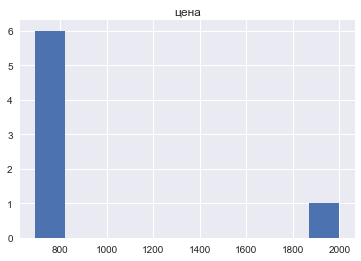

In [168]:
prices[prices[u'наименование']==u'Какао, кг'].hist()
plt.show()

## Замена на среднее

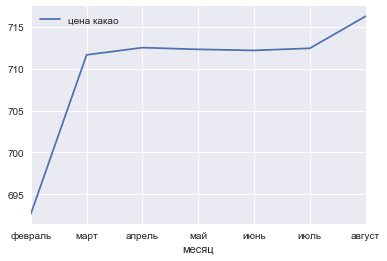

In [199]:
cocoa = prices[prices[u'наименование']==u'Какао, кг']
median = cocoa.loc[cocoa[u'цена']<2000, u'цена'].median()
cocoa.loc[cocoa[u'цена'] >= 2000,u'цена'] = np.nan
cocoa.fillna(median,inplace=True)
cocoa.plot(x=u'месяц',y=u'цена', label=u'цена какао')
plt.show()

## Удаляем все частично незаполненные наблюдения

Датасет - заявки на получение работы в НЙ


In [207]:
job_applications = pd.read_csv('datasets/dob_job_application_filings_subset.csv')

In [208]:
job_applications.dropna(inplace=True)
job_applications.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate


## Дубликаты

Датасет - упрощенные убер-поездки

In [217]:
uber = pd.read_csv('datasets/nyc_uber_2014.csv')
uber.head(2)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11,40.7690,-73.9549,B02512
1,4/1/2014 0:17,40.7267,-74.0345,B02512


In [219]:
uber[uber.duplicated()]

,Date/Time,Lat,Lon,Base
44,4/1/2014 5:44,40.7430,-74.0301,B02512
138,5/1/2014 3:28,40.7144,-74.0380,B02512
149,5/1/2014 4:17,40.7196,-74.0085,B02512
154,5/1/2014 4:28,40.7540,-73.9773,B02512
175,5/1/2014 5:27,40.7449,-73.9772,B02512
182,5/1/2014 5:38,40.7372,-74.0372,B02512
186,5/1/2014 5:40,40.7828,-73.9797,B02512
297,6/1/2014 6:51,40.7621,-73.9817,B02512
298,6/1/2014 6:51,40.7621,-73.9817,B02512


In [220]:
uber.drop_duplicates(inplace=True)
uber[uber.duplicated()]

,Date/Time,Lat,Lon,Base
